In [1]:
from PIL import Image
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"

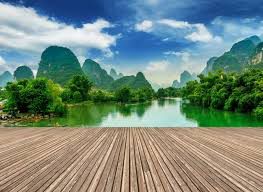

In [2]:
im = Image.open("../datafiles/sample_image.jpeg")
display(im)

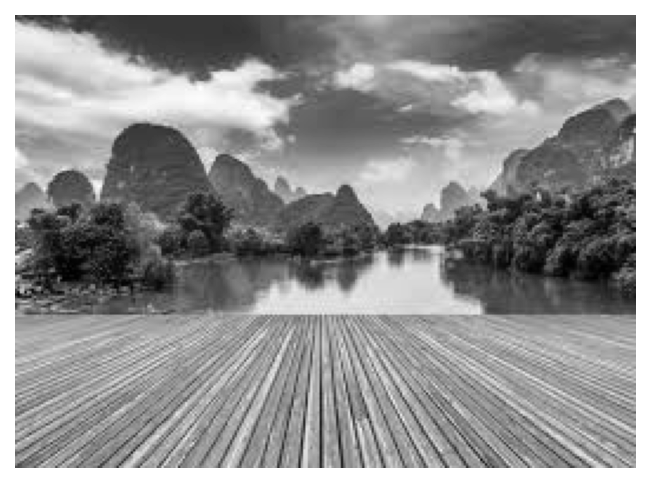

In [3]:
# convert to grayscale
im_gs = im.convert("L")
# display(im_gs)
plt.imshow(im_gs, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
# convert to array
im_array = np.array(im_gs)
im_array.shape

(192, 263)

In [5]:
data = im_array
rotation = 10

def rotate_2D(data, rotation, x=[], y=[]):
    data[np.isnan(data)] = 0
    rotation = np.deg2rad(rotation)
    c, s = np.cos(rotation), np.sin(rotation)
    rot_matrix = np.array([[c, s],
                          [-s, c]])

    data_r = np.zeros([int(abs(data.shape[0]*np.cos(rotation)) + \
                           abs(data.shape[1]*np.sin(rotation))), \
                       int(abs(data.shape[0]*np.sin(rotation)) + \
                           abs(data.shape[1]*np.cos(rotation)))])
    
    if not x:
        x = np.linspace(-data.shape[0]/2, data.shape[0]/2, data.shape[0])
    if not y:
        y = np.linspace(-data.shape[1]/2, data.shape[1]/2, data.shape[1])

    x_start = x[0]
    x_end = x[-1]
    y_start = y[0]
    y_end = y[-1]

    min_max = rot_matrix @[[x_start, x_end, x_end, x_start],\
                           [y_start, y_start, y_end, y_end]]

    X_start = min_max[0, :].min()
    X_end = min_max[0, :].max()
    Y_start = min_max[1, :].min()
    Y_end = min_max[1, :].max()

    X = np.linspace(X_start, X_end, data_r.shape[0])
    Y = np.linspace(Y_start, Y_end, data_r.shape[1])

    X_grid, Y_grid = np.meshgrid(X, Y)
    X_grid = X_grid.transpose()
    Y_grid = Y_grid.transpose()

    rot_matrix = np.array([[c, -s], \
                           [s, c]])

    x_temp, y_temp = np.copy(data_r), np.copy(data_r)
    
    mask = np.full([int(abs(data.shape[0]*np.cos(rotation)) + \
                           abs(data.shape[1]*np.sin(rotation))), \
                       int(abs(data.shape[0]*np.sin(rotation)) + \
                           abs(data.shape[1]*np.cos(rotation)))], False, dtype=bool)

    for ii in range(mask.shape[0]):
        for jj in range(mask.shape[1]):
            x_temp[ii, jj], y_temp[ii, jj] = rot_matrix @[[X_grid[ii, jj]], [Y_grid[ii, jj]]]
            if x_temp[ii, jj] < x_start or x_temp[ii, jj] > x_end or \
               y_temp[ii, jj] < y_start or y_temp[ii, jj] > y_end:
                mask[ii, jj] = True

    interp = interpolate.RectBivariateSpline(x, y, data)
    data_r = interp.ev(x_temp, y_temp)
    data_r[mask] = np.nan
    
    return data_r, X, Y

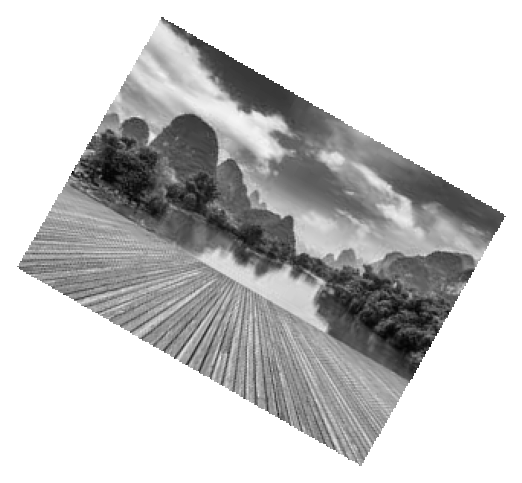

In [6]:
data_r, _, _ = rotate_2D(data, 30)
plt.imshow(data_r, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
data = im_array
rotation = 10

def rotate_3D(data, rotation, x=[], y=[]):
    data[np.isnan(data)] = 0
    rotation = np.deg2rad(rotation)
    c, s = np.cos(rotation), np.sin(rotation)
    rot_matrix = np.array([[c, s],
                          [-s, c]])

    data_r = np.zeros([int(abs(data.shape[1]*np.cos(rotation)) + \
                           abs(data.shape[2]*np.sin(rotation))), \
                       int(abs(data.shape[1]*np.sin(rotation)) + \
                           abs(data.shape[2]*np.cos(rotation)))])
    
    if not x:
        x = np.linspace(-data.shape[1]/2, data.shape[1]/2, data.shape[1])
    if not y:
        y = np.linspace(-data.shape[2]/2, data.shape[2]/2, data.shape[2])

    x_start = x[0]
    x_end = x[-1]
    y_start = y[0]
    y_end = y[-1]

    min_max = rot_matrix @[[x_start, x_end, x_end, x_start],\
                           [y_start, y_start, y_end, y_end]]

    X_start = min_max[0, :].min()
    X_end = min_max[0, :].max()
    Y_start = min_max[1, :].min()
    Y_end = min_max[1, :].max()

    X = np.linspace(X_start, X_end, data_r.shape[0])
    Y = np.linspace(Y_start, Y_end, data_r.shape[1])

    X_grid, Y_grid = np.meshgrid(X, Y)
    X_grid = X_grid.transpose()
    Y_grid = Y_grid.transpose()

    rot_matrix = np.array([[c, -s], \
                           [s, c]])

    x_temp, y_temp = np.copy(data_r), np.copy(data_r)
    
    mask = np.full([int(abs(data.shape[1]*np.cos(rotation)) + \
                           abs(data.shape[2]*np.sin(rotation))), \
                       int(abs(data.shape[1]*np.sin(rotation)) + \
                           abs(data.shape[2]*np.cos(rotation)))], False, dtype=bool)

    for ii in range(mask.shape[0]):
        for jj in range(mask.shape[1]):
            x_temp[ii, jj], y_temp[ii, jj] = rot_matrix @[[X_grid[ii, jj]], [Y_grid[ii, jj]]]
            if x_temp[ii, jj] < x_start or x_temp[ii, jj] > x_end or \
               y_temp[ii, jj] < y_start or y_temp[ii, jj] > y_end:
                mask[ii, jj] = True

    data_3r = []
    for ii in range(data.shape[0]):
        interp = interpolate.RectBivariateSpline(x, y, data[ii, :, :])
        data_r = interp.ev(x_temp, y_temp)
        data_r[mask] = np.nan
        data_3r.append(data_r)
    
    data_3r = np.array(data_3r)
    return data_3r, X, Y

In [8]:
data_3d = np.array(im)
data_3d = np.transpose(data_3d, (2, 0, 1))
data_3d.shape

(3, 192, 263)

In [9]:
data_3r, _, _ = rotate_3D(data_3d, 30)


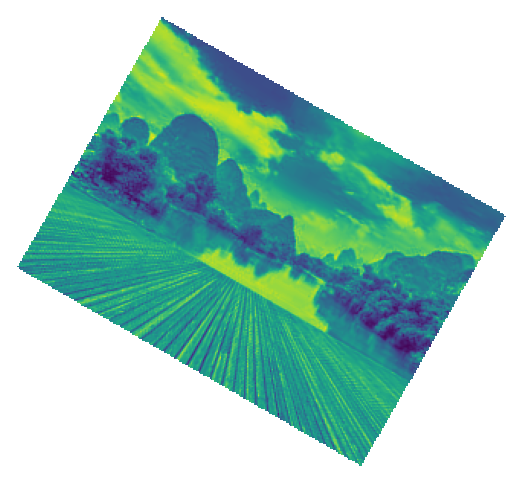

In [10]:
plt.imshow(data_3r[1, :, :])
plt.axis('off')
plt.show()